In [15]:
from datasets import load_dataset

ds = load_dataset("imageomics/rare-species", cache_dir = "/scratch/ssd004/scratch/junejory")

Resolving data files:   0%|          | 0/11984 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/11984 [00:00<?, ?it/s]

In [16]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'rarespecies_id', 'eol_content_id', 'eol_page_id', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'sciName', 'common'],
        num_rows: 11983
    })
})

In [17]:
ds.cache_files

{'train': [{'filename': '/scratch/ssd004/scratch/junejory/imageomics___rare-species/default/0.0.0/06e9eae09355d6e6e1b954ee3f54a4247a4d6fcb/rare-species-train.arrow'}]}

In [18]:
for split, dataset in ds.items():
    dataset.to_json(f"my-rarespecies-{split}.jsonl")

Creating json from Arrow format:   0%|          | 0/12 [00:00<?, ?ba/s]

In [19]:
ds['train'][0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x423>,
 'rarespecies_id': '06e0b834-b8ff-445e-9d43-2e2759aec36f',
 'eol_content_id': 10797020,
 'eol_page_id': 1198625,
 'kingdom': 'Animalia',
 'phylum': 'Arthropoda',
 'class': 'Arachnida',
 'order': 'Araneae',
 'family': 'Pisauridae',
 'genus': 'Dolomedes',
 'species': 'plantarius',
 'sciName': 'Dolomedes plantarius',
 'common': 'Fen raft spider'}

In [20]:
import json
import os
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import torch
import numpy as np
from tqdm.auto import tqdm

In [21]:
jsoners = {"train": "my-rarespecies-train.jsonl"}
json_reloaded = load_dataset("json", data_files = jsoners)

Generating train split: 0 examples [00:00, ? examples/s]

In [22]:
json_reloaded['train']['image'][0]

{'bytes': None,
 'path': '/scratch/ssd004/scratch/junejory/downloads/a68e91de517ce09494ed21b3c86afa99b5c003a4c2597b959ceb340a678b2c7f'}

In [23]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [24]:
#walk_through_dir("/scratch/ssd004/scratch/junejory/downloads/")

There are 0 directories and 35952 images in '/scratch/ssd004/scratch/junejory/downloads/'.


In [25]:
#Taxonimical Name

In [26]:
from PIL import Image

Commonlabels = []
for i in range(len(json_reloaded['train'])-2):
    try:
        img_info = json_reloaded['train'][i]
        # Assuming 'species' is a valid key, here we get the taxonomical name
        a = img_info.get('common')
        if a not in Commonlabels:
            Commonlabels.append(a)
    except (SyntaxError, IOError) as e:
        print(f"Skipping file due to error: {e}")
        continue
print(Commonlabels)


['Fen raft spider', 'Mexican flameknee tarantula', 'vernal pool tadpole shrimp', 'Giraffe Weevil', 'Blue Ground Beetle', 'Delta Green Ground Beetle', 'Giant Jawed Sawyer', 'Ceruchus chrysomelinus', 'Crotch bumble bee', 'Giant Bumble Bee', 'Mexican Bumble Bee', 'Morrison Bumblebee', 'Variable Cuckoo Bumble Bee', 'dracula ant', 'Sri Lankan Relict Ant', 'Crazy Pyramid Ant', 'Hairy Wood Ant', 'slave-making ant', 'Dinosaur Ant', 'ant', 'Pheidole neokohli', 'Broad-headed Slave-making Ant', 'Black Amazon Ant', 'Nilgiri Tiger', 'Japanese Luehdorfia', 'Cream-tipped Swampdamsel', 'Cape Thorntail', 'Rainforest Vicetail', 'red spot reedtail', 'Predatory Bush-cricket', 'Black Beauty Stick Insect', 'common spiny lobster', 'Baltic sturgeon', 'pallid sturgeon', 'shovelnose sturgeon', 'bonefish', "Rainford's butterflyfish", 'rightangled butterflyfish', 'desert pupfish', 'Tequila splitfin', 'silver hake', 'blackspot tuskfish', 'hogfish', 'cubera snapper', 'giant sea bass', 'Greenthroat Darter', 'red gro

In [28]:
# Create a list to store the label index for each image
image_labels = []

# Mapping image paths to their respective label indices
for i in range(len(json_reloaded['train'])):
    img_info = json_reloaded['train'][i]
    species_label = img_info.get('common')

    # Find the index of the label in the labels list
    label_index = Commonlabels.index(species_label)
    image_labels.append(label_index)

# Now, image_labels contains the indices of the labels for each image



In [30]:
len(image_labels)

11983

In [ ]:
# Check the number of unique labels
num_unique_labels = len(set(image_labels))

# Check the number of label embeddings
num_label_emb = label_emb.shape[0]

# Compare the two
if num_unique_labels == num_label_emb:
    print("The number of unique labels matches the number of label embeddings.")
else:
    print(f"Mismatch: {num_unique_labels} unique labels vs {num_label_emb} label embeddings.")


In [ ]:
#Common Name

In [34]:
len(Commonlabels)

398

In [35]:
''' Note that there are only 398 unique common names; 
it is not uncommon for species of the same genera to share a common name. 
The two specific instances are Acropora acuminata and Acropora millepora, which share the common name staghorn coral, 
and both Tylototriton shanjing and Tylototriton verrucosus have the common name Yunnan Newt.'''

' Note that there are only 398 unique common names; \nit is not uncommon for species of the same genera to share a common name. \nThe two specific instances are Acropora acuminata and Acropora millepora, which share the common name staghorn coral, \nand both Tylototriton shanjing and Tylototriton verrucosus have the common name Yunnan Newt.'

In [32]:
clip_labels = []
for i in range(len(Commonlabels)):
    clip_labels.append(f"a photo of {Commonlabels[i]}")

In [33]:
clip_labels

['a photo of Fen raft spider',
 'a photo of Mexican flameknee tarantula',
 'a photo of vernal pool tadpole shrimp',
 'a photo of Giraffe Weevil',
 'a photo of Blue Ground Beetle',
 'a photo of Delta Green Ground Beetle',
 'a photo of Giant Jawed Sawyer',
 'a photo of Ceruchus chrysomelinus',
 'a photo of Crotch bumble bee',
 'a photo of Giant Bumble Bee',
 'a photo of Mexican Bumble Bee',
 'a photo of Morrison Bumblebee',
 'a photo of Variable Cuckoo Bumble Bee',
 'a photo of dracula ant',
 'a photo of Sri Lankan Relict Ant',
 'a photo of Crazy Pyramid Ant',
 'a photo of Hairy Wood Ant',
 'a photo of slave-making ant',
 'a photo of Dinosaur Ant',
 'a photo of ant',
 'a photo of Pheidole neokohli',
 'a photo of Broad-headed Slave-making Ant',
 'a photo of Black Amazon Ant',
 'a photo of Nilgiri Tiger',
 'a photo of Japanese Luehdorfia',
 'a photo of Cream-tipped Swampdamsel',
 'a photo of Cape Thorntail',
 'a photo of Rainforest Vicetail',
 'a photo of red spot reedtail',
 'a photo of P

In [36]:
import open_clip

# Load the BioCLIP model and its preprocessors
model, _, preprocess = open_clip.create_model_and_transforms('hf-hub:imageomics/bioclip')
model.eval()  # Ensure model is in evaluation mode = open_clip.create_model_and_transforms('hf-hub:imageomics/bioclip')
tokenizer = open_clip.get_tokenizer('hf-hub:imageomics/bioclip')
device = "cuda" if torch.cuda.is_available() else "cpu"

In [37]:
model.to("cuda")

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0-11): 12 x ResidualAttentionBlock(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): GELU(approximate='none')
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ls_2): Identity()
        )
      )
    )
    (ln_post): LayerNorm((768,), eps=1e-05, elementwise_affine

In [38]:
tokenized_labels = tokenizer(clip_labels).to(device)

# Ensure tokenized labels are in the right format
# Note: This assumes the tokenizer returns a tensor of shape [num_labels, max_seq_length]
if tokenized_labels.ndimension() == 1:
    tokenized_labels = tokenized_labels.unsqueeze(0)

# Get the label embeddings
with torch.no_grad():
    label_emb = model.encode_text(tokenized_labels)

# label_embeddings now contains the embeddings for your labels
label_emb /= label_emb.norm(dim=-1, keepdim=True)

print(label_emb.shape)
label_emb.min(), label_emb.max()

torch.Size([398, 512])


(tensor(-0.3811, device='cuda:0'), tensor(0.7725, device='cuda:0'))

In [39]:
# Assuming json_reloaded is your loaded JSON data
image_paths = []

# Extract all image paths
for image_info in json_reloaded['train']['image']:
    image_paths.append(image_info['path'])



In [40]:
image_paths

['/scratch/ssd004/scratch/junejory/downloads/a68e91de517ce09494ed21b3c86afa99b5c003a4c2597b959ceb340a678b2c7f',
 '/scratch/ssd004/scratch/junejory/downloads/dc9abf434c0894c25413948724898f364bd2d9d80486fdc92c300d188016de70',
 '/scratch/ssd004/scratch/junejory/downloads/ae3da613ed3539b740486ddee74fadb21d716b73d95cf8666203c2cfc10be1fa',
 '/scratch/ssd004/scratch/junejory/downloads/52e47c5251cc9f6cb062c9151faadf7a2de8e6b76a7c72dfc906bfff4d783cde',
 '/scratch/ssd004/scratch/junejory/downloads/4b278aab407c5d4b3c59824411753d143daeea8649bc602cb8b99c812f7e3e0a',
 '/scratch/ssd004/scratch/junejory/downloads/dd2dbf03dc47dd04d309ff7e75bcdbe589c66d833f707b373caf45a4bc97c5de',
 '/scratch/ssd004/scratch/junejory/downloads/2d829e2e033d7b527fffd5d4135551d8991a9c67194aadae733c694ecd639bc2',
 '/scratch/ssd004/scratch/junejory/downloads/796e125c98eba7d33a8bb4ccc918cfe4f47b337706762fcfcd2543aeeb015dd2',
 '/scratch/ssd004/scratch/junejory/downloads/97a5fd4ffba7c4520689fdb1bc2ad785dce5c9c30784a710781cb933f35

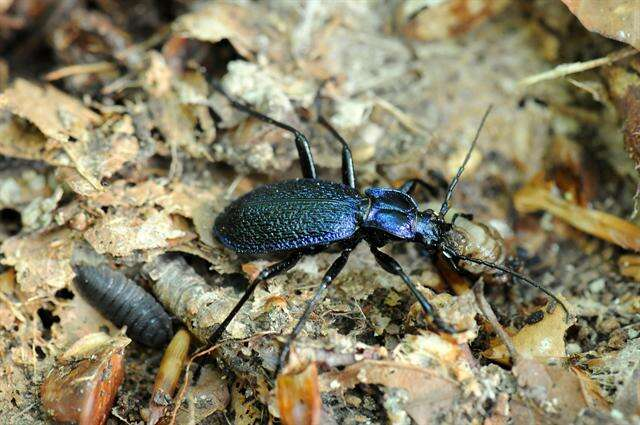

In [41]:
from PIL import Image
img = Image.open(image_paths[123])
img

In [42]:
json_reloaded

DatasetDict({
    train: Dataset({
        features: ['image', 'rarespecies_id', 'eol_content_id', 'eol_page_id', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'sciName', 'common'],
        num_rows: 11983
    })
})

In [ ]:
# for i in range(len(json_reloaded['train'])):
#     image = preprocess(Image.open(image_paths[i])).unsqueeze(0)
#     if i%1000 == 0:
#         print("There are" + str(i) + "files processed")

In [44]:
import warnings
from PIL import Image
import torch
from tqdm import tqdm

# Enable logging of DecompressionBombWarning
warnings.simplefilter('always', category=Image.DecompressionBombWarning)

problematic_images = []

# Batch processing
preds = []
batch_size = 32

for i in tqdm(range(0, len(image_paths), batch_size)):
    i_end = min(i + batch_size, len(image_paths))
    images = [Image.open(image_paths[j]) for j in range(i, i_end)]
    image_tensors = torch.stack([preprocess(image) for image in images]).to(device)

    with torch.no_grad(), torch.cuda.amp.autocast():
        img_emb = model.encode_image(image_tensors)
        img_emb /= img_emb.norm(dim=-1, keepdim=True)
        scores = (100.0 * img_emb @ label_emb.T).softmax(dim=-1)

    batch_preds = torch.argmax(scores, dim=1).cpu().numpy()
    preds.extend(batch_preds)

# Calculate accuracy
correct = sum(1 for pred, label in zip(preds, image_labels) if pred == label)
accuracy = correct / len(image_labels)
print(f"Accuracy: {accuracy:.4f}")


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 368/375 [15:02<00:21,  3.10s/it]/fs01/home/junejory/miniforge3/envs/hiera/lib/python3.10/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (115600000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████████████████████| 375/375 [15:17<00:00,  2.45s/it]

Accuracy: 0.2944


In [45]:
accuracy

0.2944170908787449

In [46]:
correct

3528

In [47]:
len(image_labels)

11983